# Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Dropout, LayerNormalization
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Loading Data

In [2]:
#load data
fold0 = pd.read_csv('C:/Users/praga/OneDrive/Desktop/AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt',sep = "\t" )
fold1 = pd.read_csv('C:/Users/praga/OneDrive/Desktop/AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt',sep = "\t")
fold2 = pd.read_csv('C:/Users/praga/OneDrive/Desktop/AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt',sep = "\t")
fold3 = pd.read_csv('C:/Users/praga/OneDrive/Desktop/AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt',sep = "\t")
fold4 = pd.read_csv('C:/Users/praga/OneDrive/Desktop/AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt',sep = "\t")

# Creating DataFrame

In [3]:
total_data = pd.concat([fold0, fold1, fold2, fold3, fold4], ignore_index=True)
print(total_data.shape)
total_data.info()

(19370, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             19370 non-null  object
 1   original_image      19370 non-null  object
 2   face_id             19370 non-null  int64 
 3   age                 19370 non-null  object
 4   gender              18591 non-null  object
 5   x                   19370 non-null  int64 
 6   y                   19370 non-null  int64 
 7   dx                  19370 non-null  int64 
 8   dy                  19370 non-null  int64 
 9   tilt_ang            19370 non-null  int64 
 10  fiducial_yaw_angle  19370 non-null  int64 
 11  fiducial_score      19370 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.8+ MB


In [4]:
total_data.describe()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000,19370.000000
mean,1023.858906,949.670212,675.659370,633.042437,629.692463,-12.405111,3.128549,72.266598
std,645.385251,667.060150,429.918002,440.409036,426.296233,73.430214,15.658667,38.799247
min,1.000000,0.000000,0.000000,80.000000,80.000000,-205.000000,-45.000000,5.000000
25%,486.000000,441.250000,333.000000,324.000000,325.000000,-80.000000,0.000000,42.000000
50%,980.000000,852.000000,653.000000,517.000000,517.000000,-5.000000,0.000000,70.000000
75%,1526.000000,1359.000000,964.000000,778.000000,778.000000,5.000000,0.000000,98.000000
max,2284.000000,10024.000000,2752.000000,3264.000000,3225.000000,365.000000,45.000000,221.000000


# Top 10 Records

In [5]:
total_data.head(10)

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,30601258@N03,10399646885_67c7d20df9_o.jpg,1,"(25, 32)",f,0,414,1086,1383,-115,30,17
1,30601258@N03,10424815813_e94629b1ec_o.jpg,2,"(25, 32)",m,301,105,640,641,0,0,94
2,30601258@N03,10437979845_5985be4b26_o.jpg,1,"(25, 32)",f,2395,876,771,771,175,-30,74
3,30601258@N03,10437979845_5985be4b26_o.jpg,3,"(25, 32)",m,752,1255,484,485,180,0,47
4,30601258@N03,11816644924_075c3d8d59_o.jpg,2,"(25, 32)",m,175,80,769,768,-75,0,34
5,30601258@N03,11562582716_dbc2eb8002_o.jpg,1,"(25, 32)",f,0,422,1332,1498,-100,15,54
6,30601258@N03,10424595844_1009c687e4_o.jpg,4,"(38, 43)",f,1912,905,1224,1224,155,0,64
7,30601258@N03,9506931745_796300ca4a_o.jpg,5,"(25, 32)",f,1069,581,1575,1575,0,30,131
8,30601258@N03,10190308156_5c748ab2da_o.jpg,5,"(25, 32)",f,474,1893,485,484,-115,30,55
9,30601258@N03,10190308156_5c748ab2da_o.jpg,2,"(25, 32)",m,1013,1039,453,452,-75,0,59


In [6]:
total_data.dtypes

user_id               object
original_image        object
face_id                int64
age                   object
gender                object
x                      int64
y                      int64
dx                     int64
dy                     int64
tilt_ang               int64
fiducial_yaw_angle     int64
fiducial_score         int64
dtype: object

# Sample Image

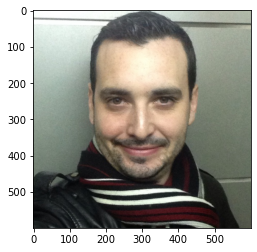

In [7]:
path = 'C:/Users/praga/OneDrive/Desktop/AdienceBenchmarkGenderAndAgeClassification/faces/'+total_data.user_id.loc[10]+"/coarse_tilt_aligned_face."+str(total_data.face_id.loc[10])+"."+total_data.original_image.loc[10]
img = load_img(path)
plt.imshow(img)
plt.show()

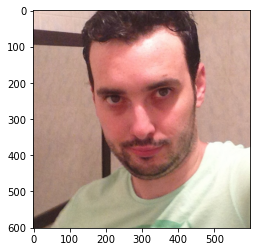

In [8]:
path = 'C:/Users/praga/OneDrive/Desktop/AdienceBenchmarkGenderAndAgeClassification/faces/'+total_data.user_id.loc[1]+"/coarse_tilt_aligned_face."+str(total_data.face_id.loc[1])+"."+total_data.original_image.loc[1]
img = load_img(path)
plt.imshow(img)
plt.show()

# Feature Extraction

In [9]:
imp_data = total_data[['age', 'gender', 'x', 'y', 'dx', 'dy']].copy()
imp_data.info()

img_path = []
for row in total_data.iterrows():
    path = 'C:/Users/praga/OneDrive/Desktop/AdienceBenchmarkGenderAndAgeClassification/faces/'+row[1].user_id+"/coarse_tilt_aligned_face."+str(row[1].face_id)+"."+row[1].original_image
    img_path.append(path)

imp_data['img_path'] = img_path
imp_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19370 entries, 0 to 19369
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     19370 non-null  object
 1   gender  18591 non-null  object
 2   x       19370 non-null  int64 
 3   y       19370 non-null  int64 
 4   dx      19370 non-null  int64 
 5   dy      19370 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 908.1+ KB


,age,gender,x,y,dx,dy,img_path
0,"(25, 32)",f,0,414,1086,1383,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
1,"(25, 32)",m,301,105,640,641,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
2,"(25, 32)",f,2395,876,771,771,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
3,"(25, 32)",m,752,1255,484,485,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
4,"(25, 32)",m,175,80,769,768,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...


# Data Preprocessing

### Age Mapping 

In [10]:
age_mapping = [('(0, 2)', '0-2'), ('2', '0-2'), ('3', '0-2'), ('(4, 6)', '4-6'), ('(8, 12)', '8-13'), ('13', '8-13'), ('22', '15-20'), ('(8, 23)','15-20'), ('23', '25-32'), ('(15, 20)', '15-20'), ('(25, 32)', '25-32'), ('(27, 32)', '25-32'), ('32', '25-32'), ('34', '25-32'), ('29', '25-32'), ('(38, 42)', '38-43'), ('35', '38-43'), ('36', '38-43'), ('42', '48-53'), ('45', '38-43'), ('(38, 43)', '38-43'), ('(38, 42)', '38-43'), ('(38, 48)', '48-53'), ('46', '48-53'), ('(48, 53)', '48-53'), ('55', '48-53'), ('56', '48-53'), ('(60, 100)', '60+'), ('57', '60+'), ('58', '60+')]

age_mapping_dict = {each[0]: each[1] for each in age_mapping}
drop_labels = []
for idx, each in enumerate(imp_data.age):
    if each == 'None':
        drop_labels.append(idx)
    else:
        imp_data.age.loc[idx] = age_mapping_dict[each]

imp_data = imp_data.drop(labels=drop_labels, axis=0) #droped None values
imp_data.age.value_counts(dropna=False)

C:\Users\praga\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


25-32    5296
38-43    2776
0-2      2509
8-13     2292
4-6      2140
15-20    1792
48-53     916
60+       901
Name: age, dtype: int64

# Visualization

### Pie Chart for Age Group  

<AxesSubplot:ylabel='age'>

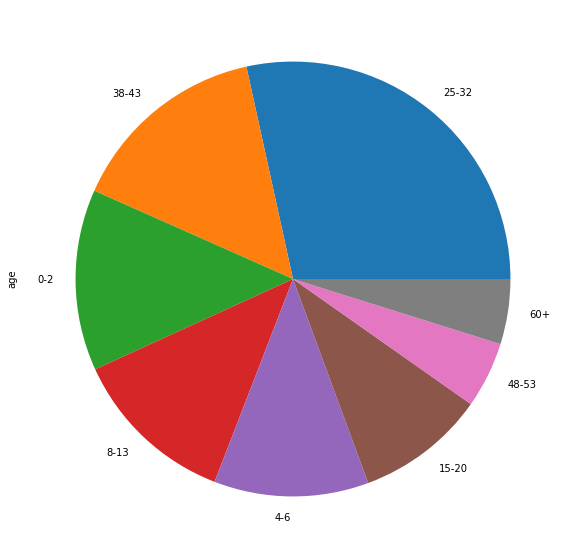

In [11]:
imp_data.age.value_counts().plot.pie(figsize=(10, 10))

### Bar Chart for Gender

In [12]:
total_data.gender.value_counts()

f    9372
m    8120
u    1099
Name: gender, dtype: int64

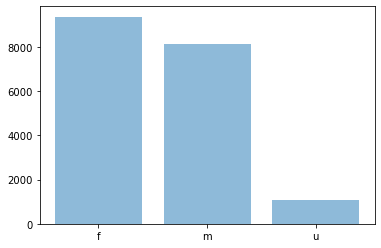

In [13]:
gender = ['f','m','u']
plt.bar(gender, total_data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

## Removing Noisy Data

In [14]:
imp_data = imp_data.dropna()
clean_data = imp_data[imp_data.gender != 'u'].copy()
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17452 entries, 0 to 19345
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       17452 non-null  object
 1   gender    17452 non-null  object
 2   x         17452 non-null  int64 
 3   y         17452 non-null  int64 
 4   dx        17452 non-null  int64 
 5   dy        17452 non-null  int64 
 6   img_path  17452 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.1+ MB


## Normalizing Data

In [15]:
gender_to_label_map = {
    'f' : 0,
    'm' : 1
}

clean_data['gender'] = clean_data['gender'].apply(lambda g: gender_to_label_map[g])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,25-32,0,0,414,1086,1383,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
1,25-32,1,301,105,640,641,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
2,25-32,0,2395,876,771,771,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
3,25-32,1,752,1255,484,485,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
4,25-32,1,175,80,769,768,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...


## Class Labelling

In [16]:
age_to_label_map = {
    '0-2'  :0,
    '4-6'  :1,
    '8-13' :2,
    '15-20':3,
    '25-32':4,
    '38-43':5,
    '48-53':6,
    '60+'  :7
}

clean_data['age'] = clean_data['age'].apply(lambda age: age_to_label_map[age])
clean_data.head()

,age,gender,x,y,dx,dy,img_path
0,4,0,0,414,1086,1383,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
1,4,1,301,105,640,641,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
2,4,0,2395,876,771,771,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
3,4,1,752,1255,484,485,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...
4,4,1,175,80,769,768,C:/Users/praga/OneDrive/Desktop/AdienceBenchma...


# Splitting Train and Test Data For Gender Model

In [17]:
X = clean_data[['img_path']]
y = clean_data[['gender']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))


Train data shape (12216, 1)
Test data shape (5236, 1)


# Resizing Input Image

In [18]:
train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


# Gender Model

In [19]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=2, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 layer_normalization (LayerN  (None, 28, 28, 96)       192       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                        

# Training Gender model

In [20]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, y_train, batch_size=32, epochs=25, validation_data=(test_images, y_test), callbacks=[callback])

print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")

model.save('gender_model25.h5')

Epoch 1/25


C:\Users\praga\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - ETA: 0s - loss: 0.9358 - accuracy: 0.5233

C:\Users\praga\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - 560s 1s/step - loss: 0.9358 - accuracy: 0.5233 - val_loss: 0.6909 - val_accuracy: 0.5348
Epoch 2/25
382/382 [==============================] - 546s 1s/step - loss: 0.6909 - accuracy: 0.5347 - val_loss: 0.6908 - val_accuracy: 0.5348
Epoch 3/25
382/382 [==============================] - 547s 1s/step - loss: 0.6910 - accuracy: 0.5347 - val_loss: 0.6908 - val_accuracy: 0.5348
Epoch 4/25
382/382 [==============================] - 551s 1s/step - loss: 0.6909 - accuracy: 0.5347 - val_loss: 0.6909 - val_accuracy: 0.5348
Epoch 5/25
382/382 [==============================] - 543s 1s/step - loss: 0.6908 - accuracy: 0.5347 - val_loss: 0.6908 - val_accuracy: 0.5348
Epoch 6/25
382/382 [==============================] - 435s 1s/step - loss: 0.6909 - accuracy: 0.5347 - val_loss: 0.6907 - val_accuracy: 0.5348
Epoch 7/25
382/382 [==============================] - 433s 1s/step - loss: 0.6909 - accuracy: 0.5347 - val_loss: 0.6908 - val_accuracy: 0.5348
Epoch 8/25

In [21]:
test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(test_acc) 

164/164 - 42s - loss: 0.6908 - accuracy: 0.5348 - 42s/epoch - 257ms/step
0.5347593426704407


In [22]:
train_acc=model.evaluate(train_images, y_train)
print('Training accuracy',train_acc)

382/382 [==============================] - 104s 273ms/step - loss: 0.6908 - accuracy: 0.5347
Training accuracy [0.6908179521560669, 0.534708559513092]


# Splitting Train and Test Data

In [28]:
X = clean_data[['img_path']]
y = clean_data[['age']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('Train data shape {}'.format(X_train.shape))
print('Test data shape {}'.format(X_test.shape))

Train data shape (12216, 1)
Test data shape (5236, 1)


# Resizing Input image for Age

In [24]:
train_images = []
test_images = []

for row in X_train.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))   # Resize the image
    data = np.asarray(image)
    train_images.append(data)

for row in X_test.iterrows():
    image = Image.open(row[1].img_path)
    image = image.resize((227, 227))  # Resize the image
    data = np.asarray(image)
    test_images.append(data)

train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

print('Train images shape {}'.format(train_images.shape))
print('Test images shape {}'.format(test_images.shape))

Train images shape (12216, 227, 227, 3)
Test images shape (5236, 227, 227, 3)


# Age Model

In [25]:
model = Sequential()
model.add(Conv2D(input_shape=(227, 227, 3), filters=96, kernel_size=(7, 7), strides=4, padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(5, 5), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())
model.add(Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(LayerNormalization())

model.add(Flatten())
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=8, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 56, 56, 96)        14208     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 layer_normalization_3 (Laye  (None, 28, 28, 96)       192       
 rNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                      

# Training Age Model

In [26]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(train_images, y_train, batch_size=32, epochs=50, validation_data=(test_images, y_test), callbacks=[callback])

model.save('age_model50.h5')

test_loss, test_acc = model.evaluate(test_images, y_test, verbose=2)
print(test_acc)

Epoch 1/50


C:\Users\praga\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - ETA: 0s - loss: 2.1482 - accuracy: 0.2838

C:\Users\praga\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


382/382 [==============================] - 461s 1s/step - loss: 2.1482 - accuracy: 0.2838 - val_loss: 1.9212 - val_accuracy: 0.2976
Epoch 2/50
382/382 [==============================] - 425s 1s/step - loss: 1.9227 - accuracy: 0.3014 - val_loss: 1.9208 - val_accuracy: 0.2976
Epoch 3/50
382/382 [==============================] - 425s 1s/step - loss: 1.9228 - accuracy: 0.3014 - val_loss: 1.9208 - val_accuracy: 0.2976
Epoch 4/50
382/382 [==============================] - 425s 1s/step - loss: 1.9233 - accuracy: 0.3014 - val_loss: 1.9217 - val_accuracy: 0.2976
Epoch 5/50
382/382 [==============================] - 426s 1s/step - loss: 1.9241 - accuracy: 0.3014 - val_loss: 1.9216 - val_accuracy: 0.2976
164/164 - 44s - loss: 1.9216 - accuracy: 0.2976 - 44s/epoch - 265ms/step
0.2975553870201111


# Loading Image From Local System

2.7.0


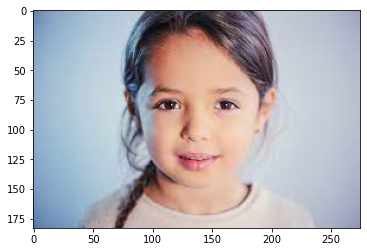

In [27]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
# Helper libraries
import numpy as np
import matplotlib.pyplot as pl
print(tf.__version__)
path='img.jpg'
img = load_img(path)
plt.imshow(img)
plt.show()